 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/README.ipynb#初始化" data-toc-modified-id="初始化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>初始化</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取交易日" data-toc-modified-id="获取交易日-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>获取交易日</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取上市公司信息" data-toc-modified-id="获取上市公司信息-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>获取上市公司信息</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取balance表中的数据" data-toc-modified-id="获取balance表中的数据-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>获取balance表中的数据</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取cashflow表中的数据" data-toc-modified-id="获取cashflow表中的数据-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>获取cashflow表中的数据</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取income表中的数据" data-toc-modified-id="获取income表中的数据-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>获取income表中的数据</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取股票每日交易数据" data-toc-modified-id="获取股票每日交易数据-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>获取股票每日交易数据</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取复权因子信息" data-toc-modified-id="获取复权因子信息-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>获取复权因子信息</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取分红数据" data-toc-modified-id="获取分红数据-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>获取分红数据</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取股东数量" data-toc-modified-id="获取股东数量-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>获取股东数量</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取股东结构" data-toc-modified-id="获取股东结构-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>获取股东结构</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取股本" data-toc-modified-id="获取股本-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>获取股本</a></span></li><li><span><a href="http://localhost:8888/notebooks/README.ipynb#获取行业类型" data-toc-modified-id="获取行业类型-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>获取行业类型</a></span></li></ul></div>

# python环境下的聚源数据获取接口描述

基于原本matlab的工作，我重新撰写了python环境下取聚源部分数据的接口。由于把原本数据从“表”的形态转换成“矩阵”的算法进行了重新改写，彻底去除了循环遍历，因此读取速度相较于matlab相同功能的接口反而有大幅增加。

## 初始化
暂时工具还是需要通过加入系统搜索变量的方式。

In [20]:
import sys
sys.path.append('D:\pythonwork\MyToolBox')
import time

我们把整个架构用面向对象撰写，所以需要获得初始化对象**JDB**

In [3]:
import JuyuanQuery as JQ
from imp import reload
reload(JQ)        
JDB=JQ.JuYuanDB()
first_day='2015-01-01'
last_day='2017-08-01'

## 获取交易日
只要两个参数：**first_day**和**last_day**

In [62]:
trading_date=JDB.query_tradingday(first_day, last_day)
trading_date.head(5)

,TradingDate
0,2015-01-05
1,2015-01-06
2,2015-01-07
3,2015-01-08
4,2015-01-09


## 获取上市公司信息
暂时没有加入*截止到某一时间前上市的上市公司*的功能

In [5]:
stockinfo=JDB.query_stockinfo()
stock_innercode=stockinfo.index.values
stockinfo.head(5)

,SecuCode,ChiName,ListedDate,Exchange,sState,SecuAbbr
InnerCode,,,,,,
3,000001,平安银行股份有限公司,1991-04-03,深圳证券交易所,上市,平安银行
6,000002,万科企业股份有限公司,1991-01-29,深圳证券交易所,上市,万 科Ａ
11,000003,金田实业(集团)股份有限公司,1991-07-03,深圳证券交易所,终止,PT金田Ａ
14,000004,深圳中国农大科技股份有限公司,1991-01-14,深圳证券交易所,上市,国农科技
17,000005,深圳世纪星源股份有限公司,1990-12-10,深圳证券交易所,上市,世纪星源


## 获取balance表中的数据
相较于matlab，通过接口获取的数据形式有两种：
1. 一个$n_{date}\times n_{stock}$ 的大矩阵，为DataFrame格式，类似于原本matlab中的大矩阵，在获取函数中设定*mode*参数为*mat*
2. 原始的数据获取列表，在获取函数中设定*mode*参数为*tab*

另外部分函数支持其他参数。如query_balance函数支持indendate为All（全部数据），或者3、6、9、12（对应季报、半年报、年报）

支持字段方面，请直接查阅LC_BalanceSheetAll表中的字段

我们先尝试读取*mode='mat'，indenddate='All'*的情况。

In [12]:
import time
t1=time.time()
name='TradingAssets'
balance=JDB.query_balance(stock_innercode, name, first_day, last_day, indenddate='All',mode='mat')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
balance.head(5)

读取时间为3.5620007514953613秒


,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-01-05,1.480800e+10,740470.77,NaN,0.0,0.0,0.0,0.0,26817079.28,293115584.9,0.0,...,NaN,NaN,263418.36,713750.0,1772640.0,NaN,NaN,NaN,NaN,NaN
2015-01-06,1.480800e+10,740470.77,NaN,0.0,0.0,0.0,0.0,26817079.28,293115584.9,0.0,...,NaN,NaN,263418.36,713750.0,1772640.0,NaN,NaN,NaN,NaN,NaN
2015-01-07,1.480800e+10,740470.77,NaN,0.0,0.0,0.0,0.0,26817079.28,293115584.9,0.0,...,NaN,NaN,263418.36,713750.0,1772640.0,NaN,NaN,NaN,NaN,NaN
2015-01-08,1.480800e+10,740470.77,NaN,0.0,0.0,0.0,0.0,26817079.28,293115584.9,0.0,...,NaN,NaN,263418.36,713750.0,1772640.0,NaN,NaN,NaN,NaN,NaN
2015-01-09,1.480800e+10,740470.77,NaN,0.0,0.0,0.0,0.0,26817079.28,293115584.9,0.0,...,NaN,NaN,263418.36,713750.0,1772640.0,NaN,NaN,NaN,NaN,NaN


我们读取*mode='tab',indenddate=12*的情况

In [13]:
t1=time.time()
balance_tab=JDB.query_balance(stock_innercode, name, first_day, last_day, indenddate=12,mode='tab')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
balance_tab.head(5)

读取时间为0.6082656383514404秒


,innercode,info_publdate,data_date,TradingAssets
0,3,2007-03-22,2006-12-31,4.273584e+08
1,3,2008-03-20,2007-12-31,1.477625e+09
2,3,2009-03-20,2008-12-31,4.144100e+07
3,3,2010-03-12,2009-12-31,1.132048e+09
4,3,2011-02-25,2010-12-31,NaN


## 获取cashflow表中的数据

LC_CashFlowStatementAll

In [15]:
t1=time.time()
name='NetProfit'
cashflow=JDB.query_cashflow(stock_innercode, name, first_day, last_day, indenddate='All',mode='mat')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
cashflow.head(5)

读取时间为4.099374294281006秒


,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-01-05,1.007200e+10,5.492480e+09,-7617568.64,-4738622.68,-25219942.17,48681205.32,-6130543.33,8633415.21,3.177001e+08,-7199268.54,...,NaN,13458046.87,10246602.49,95167130.64,49805938.61,NaN,NaN,NaN,NaN,NaN
2015-01-06,1.007200e+10,5.492480e+09,-7617568.64,-4738622.68,-25219942.17,48681205.32,-6130543.33,8633415.21,3.177001e+08,-7199268.54,...,NaN,13458046.87,10246602.49,95167130.64,49805938.61,NaN,NaN,NaN,NaN,NaN
2015-01-07,1.007200e+10,5.492480e+09,-7617568.64,-4738622.68,-25219942.17,48681205.32,-6130543.33,8633415.21,3.177001e+08,-7199268.54,...,NaN,13458046.87,10246602.49,95167130.64,49805938.61,NaN,NaN,NaN,NaN,NaN
2015-01-08,1.007200e+10,5.492480e+09,-7617568.64,-4738622.68,-25219942.17,48681205.32,-6130543.33,8633415.21,3.177001e+08,-7199268.54,...,NaN,13458046.87,10246602.49,95167130.64,49805938.61,NaN,NaN,NaN,NaN,NaN
2015-01-09,1.007200e+10,5.492480e+09,-7617568.64,-4738622.68,-25219942.17,48681205.32,-6130543.33,8633415.21,3.177001e+08,-7199268.54,...,NaN,13458046.87,10246602.49,95167130.64,49805938.61,NaN,NaN,NaN,NaN,NaN


In [16]:
t1=time.time()
cashflow_tab=JDB.query_cashflow(stock_innercode, name, first_day, last_day, indenddate=12,mode='tab')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
cashflow_tab.head(5)

读取时间为0.634000301361084秒


,innercode,info_publdate,data_date,NetProfit
0,3,2007-03-22,2006-12-31,1.302907e+09
1,3,2008-03-20,2007-12-31,2.649903e+09
2,3,2009-03-20,2008-12-31,6.140350e+08
3,3,2010-03-12,2009-12-31,5.030729e+09
4,3,2011-02-25,2010-12-31,6.283816e+09


## 获取income表中的数据
LC_IncomeStatementAll

In [28]:
t1=time.time()
name='TotalOperatingRevenue'
income=JDB.query_income(stock_innercode, name, first_day, last_day, indenddate='All',mode='mat')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
income.head(5)

读取时间为4.362001180648804秒


,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-01-05,5.465100e+10,6.313959e+10,4437056.3,48419079.33,35845232.95,6.498544e+08,1.087502e+08,2.275744e+08,2.661761e+09,1.309758e+08,...,NaN,71219140.06,1.015422e+08,736347752.5,1.099455e+10,NaN,NaN,NaN,NaN,NaN
2015-01-06,5.465100e+10,6.313959e+10,4437056.3,48419079.33,35845232.95,6.498544e+08,1.087502e+08,2.275744e+08,2.661761e+09,1.309758e+08,...,NaN,71219140.06,1.015422e+08,736347752.5,1.099455e+10,NaN,NaN,NaN,NaN,NaN
2015-01-07,5.465100e+10,6.313959e+10,4437056.3,48419079.33,35845232.95,6.498544e+08,1.087502e+08,2.275744e+08,2.661761e+09,1.309758e+08,...,NaN,71219140.06,1.015422e+08,736347752.5,1.099455e+10,NaN,NaN,NaN,NaN,NaN
2015-01-08,5.465100e+10,6.313959e+10,4437056.3,48419079.33,35845232.95,6.498544e+08,1.087502e+08,2.275744e+08,2.661761e+09,1.309758e+08,...,NaN,71219140.06,1.015422e+08,736347752.5,1.099455e+10,NaN,NaN,NaN,NaN,NaN
2015-01-09,5.465100e+10,6.313959e+10,4437056.3,48419079.33,35845232.95,6.498544e+08,1.087502e+08,2.275744e+08,2.661761e+09,1.309758e+08,...,NaN,71219140.06,1.015422e+08,736347752.5,1.099455e+10,NaN,NaN,NaN,NaN,NaN


In [29]:
t1=time.time()
income_tab=JDB.query_income(stock_innercode, name, first_day, last_day, indenddate=12,mode='tab')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
income_tab.head(5)

读取时间为0.6499984264373779秒


,innercode,info_publdate,data_date,TotalOperatingRevenue
0,3,2007-03-22,2006-12-31,7.135218e+09
1,3,2008-03-20,2007-12-31,1.080750e+10
2,3,2009-03-20,2008-12-31,1.451312e+10
3,3,2010-03-12,2009-12-31,1.511444e+10
4,3,2011-02-25,2010-12-31,1.802228e+10


## 获取股票每日交易数据
QT_DailyQuote

In [21]:
t1=time.time()
name='ClosePrice'
close=JDB.query_quote(stock_innercode, name, first_day, last_day, mode='mat')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
close.head(5)

读取时间为16.692004919052124秒


,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-01-05,16.02,14.91,NaN,15.69,NaN,7.08,14.52,21.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,15.78,14.36,NaN,16.46,NaN,6.85,14.27,21.83,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,15.48,14.23,NaN,16.41,NaN,6.86,14.59,22.33,13.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,14.96,13.59,NaN,16.92,NaN,6.78,14.58,23.04,13.35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,15.08,13.45,NaN,16.43,NaN,6.7,14.5,23.17,12.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
t1=time.time()
close_tab=JDB.query_quote(stock_innercode, name, first_day, last_day, mode='tab')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
close_tab.head(5)

读取时间为12.265001058578491秒


,innercode,info_publdate,ClosePrice,data_date
0,3,2015-01-05,16.02,2015-01-05
1,3,2015-01-06,15.78,2015-01-06
2,3,2015-01-07,15.48,2015-01-07
3,3,2015-01-08,14.96,2015-01-08
4,3,2015-01-09,15.08,2015-01-09


## 获取复权因子信息
该数据为数张表结合计算，比较复杂。

In [22]:
t1=time.time()
restoref=JDB.query_restoref(stock_innercode, first_day, last_day, mode='mat')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
restoref.head(5)

D:\pythonwork\MyToolBox\DataImport\JuyuanQuery.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pre_close_lack['PrevClosePrice']=pre_close_lack.apply(find_preclose,axis=1)
D:\pythonwork\MyToolBox\DataImport\JuyuanQuery.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.sort_values(by=['innercode','info_publdate','data_date'],inplace=True)
D:\pythonwork\MyToolBox\DataImport\JuyuanQuery.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

读取时间为36.71505069732666秒


,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-01-05,1.0,1.0,1,1,1,1.0,1.0,1.0,1.0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-06,1.0,1.0,1,1,1,1.0,1.0,1.0,1.0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-07,1.0,1.0,1,1,1,1.0,1.0,1.0,1.0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-08,1.0,1.0,1,1,1,1.0,1.0,1.0,1.0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-09,1.0,1.0,1,1,1,1.0,1.0,1.0,1.0,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
import time
t1=time.time()
restoref_tab=JDB.query_restoref(stock_innercode, first_day, last_day, mode='tab')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
restoref_tab.head(5)

读取时间为33.06217694282532秒


D:\pythonwork\MyToolBox\DataImport\JuyuanQuery.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pre_close_lack['PrevClosePrice']=pre_close_lack.apply(find_preclose,axis=1)


,innercode,info_publdate,data_date,restore_factor
0,151.0,2017-05-31,2017-05-31,0.921573
1,338.0,2016-04-27,2016-04-27,0.886242
2,361.0,2016-04-15,2016-04-15,0.950618
3,453.0,2016-02-05,2016-02-05,0.934232
4,596.0,2017-07-27,2017-07-27,0.928592


由于复权因子数据进行了多次加工，为了确保其正确性，我们要拿wind数据进行对比。
先整理成前复权因子

In [23]:
restore_reverse=restoref.iloc[::-1]
restore_reverse.head(5)
restore_reverse_cum=restore_reverse.cumprod()
restore_f_cum=restore_reverse_cum.iloc[::-1]
restore_f_cum.head(5)

,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-01-05,0.66493,0.925879,1.0,1.0,1.0,0.956049,0.666667,0.229557,0.734813,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-01-06,0.66493,0.925879,1.0,1.0,1.0,0.956049,0.666667,0.229557,0.734813,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-01-07,0.66493,0.925879,1.0,1.0,1.0,0.956049,0.666667,0.229557,0.734813,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-01-08,0.66493,0.925879,1.0,1.0,1.0,0.956049,0.666667,0.229557,0.734813,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-01-09,0.66493,0.925879,1.0,1.0,1.0,0.956049,0.666667,0.229557,0.734813,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


计算股票前复权价格

In [24]:
close_f=close*restore_f_cum
close_f.head(5)

,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-01-05,10.6522,13.8049,NaN,15.69,NaN,6.76883,9.68,4.98138,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,10.4926,13.2956,NaN,16.46,NaN,6.54894,9.51333,5.01122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,10.2931,13.1753,NaN,16.41,NaN,6.5585,9.72667,5.126,9.79506,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,9.94735,12.5827,NaN,16.92,NaN,6.48202,9.72,5.28899,9.80976,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,10.0271,12.4531,NaN,16.43,NaN,6.40553,9.66667,5.31883,9.53787,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
from WindPy import *
stock=26
stock_code=stockinfo['SecuCode'][stock]+'.SZ'
w.start()
data=w.wsd(stock_code,"close", first_day,last_day,'PriceAdj=f')


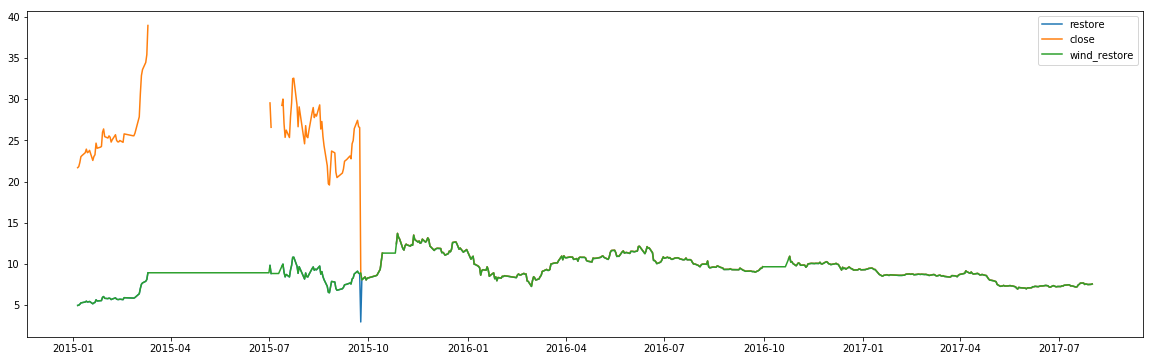

In [69]:
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(20,6))
plt.plot(trading_date['TradingDate'],close_f[stock].values)
plt.plot(trading_date['TradingDate'],close[stock].values)
plt.plot(trading_date['TradingDate'],data.Data[0])
plt.legend(['restore','close','wind_restore'])
plt.show()

In [61]:
restoref_tab[restoref_tab['innercode']==stock]

,innercode,info_publdate,data_date,restore_factor
31,26.0,2015-03-13,1970-01-01,0.689655
32,26.0,2015-09-24,2015-09-24,0.333333
33,26.0,2017-06-02,2017-06-02,0.998571


In [45]:
data.Data[0][-1]

22.649412680253306

In [42]:
close_f[stock].values[-1]

23.42

In [43]:
close[stock].values[-1]

23.42

## 获取分红数据
LC_Dividend

In [26]:
t1=time.time()
name='CashDiviRMB'
dividend=JDB.query_dividend(stock_innercode, name, first_day, last_day, mode='mat')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
dividend.iloc[63:70,:]

读取时间为2.429004669189453秒


,3,6,11,14,17,20,23,26,28,31,...,106031,106940,114403,115868,118397,121578,126344,133775,134730,135818
2015-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-13,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


该矩阵比较稀疏，因为没有采取前值替代的方式

In [18]:
t1=time.time()
dividend_tab=JDB.query_dividend(stock_innercode, name, first_day, last_day, mode='tab')
t2=time.time()
print('读取时间为{}秒'.format(t2-t1))
dividend_tab.head(5)

读取时间为0.09899735450744629秒


,innercode,info_publdate,CashDiviRMB,data_date
0,3,2015-04-13,1.74,2015-04-13
1,3,2016-06-16,1.53,2016-06-16
2,3,2017-07-21,1.58,2017-07-21
3,6,2015-07-21,5.00,2015-07-21
4,6,2016-07-29,7.20,2016-07-29


## 获取股东数量

## 获取股东结构

## 获取股本

## 获取行业类型